## Visulalisation de donées et Corona-virus

puisque le contexte est propice à l'analyse de données, voyons ce que l'on peut observer et conclure sur les données sur coronavirus.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize 

Chargement du jeu de données: on va récupérer les données de Hubei (Chine), Corée du sud, France, Italie et Espagne. Dans la cellule qui suit, on récupère donc le nombre de cas infectés par jour, depuis le 22 janvier 2020.

In [453]:
data_cases_sk = np.array([]) 
data_cases_fr = np.array([]) 
data_cases_it = np.array([]) 
data_cases_es = np.array([]) 
data_cases_ch = np.array([]) 

for f in open("data/time_series_19-covid-Confirmed.csv"): 
    elt = f.split(",")
    if(elt[1]=="Country/Region"):
        date = elt[4:] # On récupère la date
    if(elt[1]=="SKorea"): 
        data = elt[4:] 
        for d in data: 
            data_cases_sk = np.append(data_cases_sk,int(d))
    if(elt[0]=="Hubei"): 
        data = elt[4:] 
        for d in data: 
            data_cases_ch = np.append(data_cases_ch,int(d))
    if(elt[0]=="France"): 
        data = elt[4:] 
        for d in data: 
            data_cases_fr = np.append(data_cases_fr,int(d))
    if(elt[1]=="Italy"): 
        data = elt[4:] 
        for d in data: 
            data_cases_it = np.append(data_cases_it,int(d))
    if(elt[1]=="Spain"): 
        data = elt[4:] 
        for d in data: 
            data_cases_es = np.append(data_cases_es,int(d))
            
          

Regardons maintenant l'allure des différentes courbes (ici le nombre de cas détectés).

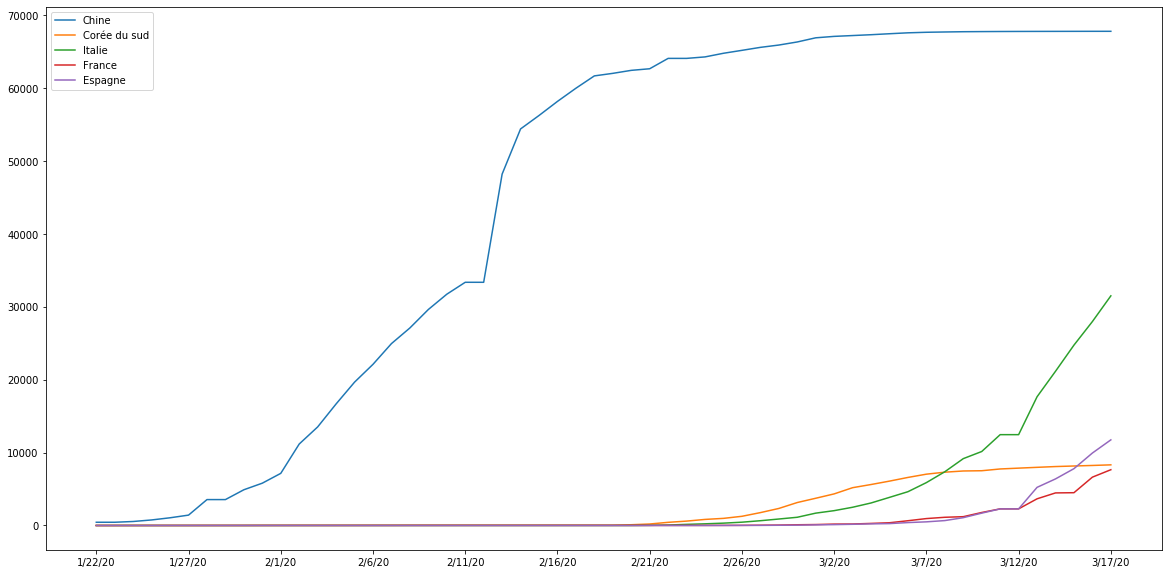

In [484]:
f = plt.figure(figsize=(20,10))
plt.plot(date,data_cases_ch,label="Chine")
plt.plot(data_cases_sk,label="Corée du sud")
plt.plot(data_cases_it,label="Italie")
plt.plot(data_cases_fr,label="France")
plt.plot(data_cases_es,label="Espagne")
plt.legend()
plt.gca().set(xticks=date[0::5], xticklabels=date[0::5]);
# plt.xticks()
# plt.show()

En regardant les dates, on voit que les données commencent au lockdown de Wuhan. Sur la courbe des données chinoise, on voit un événement entre le 11 et le 16 février (regarder plus précisément la date). En utilisant le site https://en.wikipedia.org/wiki/Timeline_of_the_2019%E2%80%9320_coronavirus_pandemic, peut-on donner une raison à ce changement brutal de comportement ?

Une inspection rapide, montre que les échelles des différents pays ne permettent pas de voir les graphes correctement, que faut-il donc faire ?

Arrive-t-on à comprendre la brisure de la courbe de Corée du sud (entre le 116 et 21 février) à l'aide de ces informations : https://thegroundtruthproject.org/timeline-how-south-korea-reacted-to-the-covid-19-outbreak/ ?

Arrive-t-on à comprendre celle de l'italy (voir https://en.wikipedia.org/wiki/2020_coronavirus_pandemic_in_Italy) ?

Ces courbes sont assez difficile à analyser, non seulement les méthodes sont différentes d'un pays à un autre mais en plus elles ne partent pas à la même date. Pour pallier à ce problème, on peut regarder le nombre de morts qui est sans doute plus "fidèle" à la réalité.

In [488]:
data_deaths_sk = np.array([]) 
data_deaths_fr = np.array([]) 
data_deaths_it = np.array([]) 
data_deaths_es = np.array([]) 
data_deaths_ch = np.array([]) 

for f in open("data/time_series_19-covid-Deaths.csv"): 
    elt = f.split(",") 
    if(elt[1]=="SKorea"): 
        data = elt[4:] 
        for d in data: 
            data_deaths_sk = np.append(data_deaths_sk,int(d))
    if(elt[0]=="Hubei"): 
        data = elt[4:] 
        for d in data: 
            data_deaths_ch = np.append(data_deaths_ch,int(d))
    if(elt[0]=="France"): 
        data = elt[4:] 
        for d in data: 
            data_deaths_fr = np.append(data_deaths_fr,int(d))
    if(elt[1]=="Italy"): 
        data = elt[4:] 
        for d in data: 
            data_deaths_it = np.append(data_deaths_it,int(d))
    if(elt[1]=="Spain"): 
        data = elt[4:] 
        for d in data: 
            data_deaths_es = np.append(data_deaths_es,int(d))
            
# Correction au jeu de données     
data_deaths_fr[-1] = 175
data_deaths_fr[53] = 127
data_deaths_fr[50] = 61
data_deaths_fr[47] = 30          

data_deaths_it[39] = 41
data_deaths_it[50] = 1016

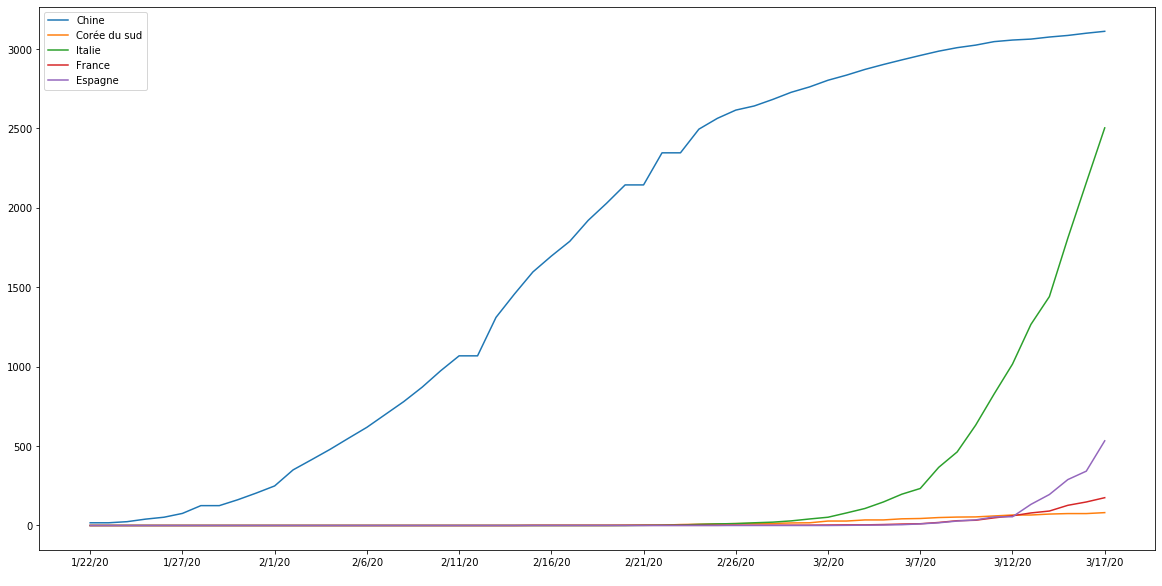

In [490]:
f = plt.figure(figsize=(20,10))
plt.plot(date,data_deaths_ch,label="Chine")
plt.plot(data_deaths_sk,label="Corée du sud")
plt.plot(data_deaths_it,label="Italie")
plt.plot(data_deaths_fr,label="France")
plt.plot(data_deaths_es,label="Espagne")
plt.legend()
plt.gca().set(xticks=date[0::5], xticklabels=date[0::5]);
plt.show()

**Q:** Encore une fois, on a sur un même graphe différentes échelles présente. Comment peut-on faire pour visualiser correctement toutes les données ?

**Q:** Qu'observe-t-on sur le graph une fois que les échelles sont visibles ? que signifie le fait d'avoir "une droite" ?

On a l'impression que les courbes présentes des similarités. Essayer en modifier l'abscisse pour regrouper les différentes courbes sur une même allure générale 

**Q:** Peut-on trouver sur ce graphe une droite qui semble témoigner de la pente de presque toutes les courbes ? Trouver la fonction et l'afficher sur le graphe

On peut maintenant calculer le coefficient de doublement. Sachant que les x reprénsent le nombre de morts cumulés chaque jour: 

  1. à $t_0$, on a un nombre de morts cumulés de $e^{(t_0-b)}$
  2. on cherche $t_1 = t_0+\alpha$ tel que $e^{(t_0+\alpha-b)} = 2e^{(t_0-b)}$
  
**Q:** quelle est la période de doublement ?
  

### **Modélisation** : comment comprendre la croissance exponentielle (de façon simple)

On peut voir la croissance exponentielle dans la croissance des bactéries, de composées chimiques ou autre. Pour s'en rendre compte on utilise en général la modélisation suivante :

Soit une concentration $n(t)$ de bactéries au temps t. On considère qu'en moyenne, chaque bactéries va se reproduire par un facteur $\alpha$ par unité de temps. Evidement ici, le facteur $\alpha$ dépend du type de bactéries des conditions etc. Néanmoins, on aura donc en utilisant cette approximation

$$
n(t+\Delta t) \approx n(t) + \alpha n(t) \Delta t
$$

pour un incrément temporel $\Delta t$ pas trop grand. On peut donc ré-écrire l'équation précédente sous la forme

$$ 
\frac{n(t+\Delta t) - n(t)}{\Delta t} = \alpha n(t)
$$


**Q:** Lorsque $\Delta t$ devient trèes petit (infiniement petit), comment se transforme l'équation précédente ?

**Q:** Trouver la forme de la solution à l'équation obtenue.

**Q:** Quelle le problème de la solution, sur le long terme ?


#### **Saturation** (le cas de la Chine)

La Chine a pratiqué le confinement dans la région de Wuhan afin d'endiguer l'épidémie. On voit sur le graph du nombre de morts que celui sort de l'allure exponentielle et finit par atteindre une croissance pratiquement nulle.

Une façon d'obtenir une saturation, dans la description macroscopique de notre épidémie est de contrebalancer le terme de croissance ($\alpha n(t)$) par un terme négatif. On peut l'écrire de façon générale ainsi!

$$
  \frac{dn(t)}{dt} = n(t)( \alpha - \beta f(n(t)) )
$$

où $f$ est une fonction qui peut dépendre de $n(t)$ et $\alpha$, $\beta$ les paramètres du problème. On voit tout de suite que la fonction $f(x)=1$ ne peut pas marcher car la croissance (ou décroissance) sera uniquement donnée par le signe de $\alpha-\beta$. Une solution simple est de prendre $f(x)=x$:

$$
  \frac{dn(t)}{dt} = n(t)( \alpha - \beta n(t) )
$$

**Q:** Chercher les valeur de $n(t)$ pour lesquelles la croissance est nulle ($dn/dt = 0$). En déduire l'allure de la solution lorsque l'on part de $n(t=0)$ proche de $0$ (mais strictement supérieur).

Ce type de modélisation revient à dire la chose suivante : lorsque le nombre d'individus devient grand, cela va réduire le taux de croissance (on peut imaginer plusieurs raisons, vous rencontrez des personnes déjà malades donc il y a moins de "proies" possibles, vous voyez moins de gens à cause de mesure de confinement dû à un grand nombre de contaminations ...).

**Q:**
  1. montrer que la solution peut s'écrire sous la forme $n(t) = \frac{a}{1+be^{-c x}}$ et identifier les paramètres $a,b,c$ à $n_0=n(t=0)$, $\alpha$ et $\beta$
  2. (facultatif) résoudre l'équation différentielle ci-dessus en utilisant le changement de variable : $u(t) = 1/n(t)$
 
  
Cette solution est appelée fonction logistic. Regardons maintenant ce que l'on obtient si l'on ajuste la fonction sur la courbe chinoise :

### Ajustement sur la courbe
On veut maintenant ajuster notre solution sur la courbe de la Chine. On va donc faire de la régression (cf le cours) où il s'agira de minimiser la quantité suivante:

$$
  \sum_i || y_i - f(x_i) ||^2
$$

où la somme cours sur les données, les $x_i$ correspondent ici aux abscisse (les jours), $y_i$ le nombre de morts le jour correspondant et $f$ la fonctino à trouver. On minimisera cette quantité sur les paramètre de notre fonction (ici $n_0$, $\alpha$ et $\beta$, ou, de façon équivalente $a$, $b$ et $c$).

Dans la cellule suivante, un exemple de comment ajuster la fonction sur la courbe est donné.

In [498]:
# On définit la fonction que l'on veut ajuster
#   p: paramètres de la fonction
#   x: argument
fit_logfunc = lambda p, x: p[0]/(1+np.exp(-p[1]*(x-p[2]))) # on utilise la fonction logistic

# On définit la fonction à minimiser, cf la cellule au dessus.
errfunc = lambda p, x, y: fit_logfunc(p, x) - y # Distance to the target 

# Il faut impérativemnt donner une valeur initiale aux paramètres que l'on cherche (l'algorithme est itératif). 
# Il faudra donc utiliser des valeurs "raisonnbles" afin que l'algorithme converge
p0 = [0,0.16,10]

# On recupère la valeur des paramètres trouvés
p1_l, success = optimize.leastsq(errfunc, p0[:], args=(xr,data_deaths_ch))

**Q:** Tracer la courbe des morts chinois et, en surimpression, la fonction obtenue par l'ajustement

Donner la valeur asymptotique obtenue ici (au temps très long) et la comparer aux données actualisées jour après jour (cf https://en.wikipedia.org/wiki/2019%E2%80%9320_coronavirus_pandemic_by_country_and_territory)

### Taux de mortalité et nombre de morts

Une fois ajustée la fonction logistic, on peut tenter de comprendre si celle-ci modélise correctement le tux de croissance de la mortalité et donc également le nombre de morts par jour.

#### <u> Taux de mortalité : </u>

Pour calculer le taux de mortalité, il faut regarder la variation du nombre de mort : $\Delta n = n(t+1) - n(t)$ et le rapporter au nombre total de mort à l'instant $t$ : 

$$
  \frac{\Delta n}{n(t)} = \frac{n(t+1)-n(t)}{n(t)} 
$$

Cette équation devient égale à $\alpha$ dans le cas d'une croissance exponentielle.

**Q:** En utilisant l'expression ci-dessus, calculer le taux de mortalité des morts chinois et le comparer à la prédiction donnée par la fonction exponentielle et par la fonction logistic.

### <u> Nombre de morts quotidien </u>

A partir des données choinoises, calculer le nombre de morts quotidien. Du point de vue des la modélisation cela revient à calculer la dérivée des fonctions utilisées pour ajuster les données.

**Q:**

  1. Calculer la dérivée de la fonction exponentielle $f(t)=n_0 e^{\alpha t}$
  2. Calculer la dérivée de la fonction logistic.
  3. Afficher le graphe de nombre de morts par jour en chine.
  4. Ce graph est-il cohérent avec la modélisation exponentielle ? (pas besoin de tracer la dérivée de la fonction pour répondre ici)
  5. Ce graph est-il cohérent avec la modélisation par la fonction logistic ? (afficher les donées ainsi que la dérivée calculée


    
    


## Travail à effectuer pour la suite


On a vu comment modéliser les données chinoise à l'aide de deux fonctions différentes (expoenentielle et logistic).

**Partie 1:** on a vu que la fonction logistic ne marche pas très bien non plus avec les données chinoise. On peut tenter un autre type de fonction : 

$$
  f(t) = A \exp(B \exp(-C t))
$$

En utilisant cette nouvelle fonction et les conditions initiales suivant pour ajuster les paramètres : $A=0$, $B=0.16$, $C=10$, regarder si cette nouvelle fonction permet de modéliser correctement les données chinoises (vous vérifiez le nombre de morts cumulé, le taux de mortalité et le nombre de mort quotidien (en calculant la déivée).

Note : cette fonction est la solution de l'équation différentielle suivante

$$
\frac{dn}{dt} = n(t)(\alpha - \beta \log(n(t)))
$$


**Partie 2:** refaite l'analyse sur les données Italienne.

**Partie 3:** que voit-on dans les données française ?

On voit que dans le modèle de Gompertz, la croissance est impactée plus rapidement mais qu'ensuite elle chute moins vite.
Tentons de faire un fit utilisant la fonction de Gompertz. La solution est donnée par

$$
  f(x) = A\exp(B \exp(-ax))
$$